In [96]:
import pandas
import configparser
import psycopg2

In [97]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [98]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [99]:
sql = "select * from student" 

In [100]:
df = pandas.read_sql_query(sql,conn) 

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [101]:
sql = """
    select professor.p_name,course.c_name
    from professor 
    inner join course
    on professor.p_email = course.p_email
"""

In [102]:
df = pandas.read_sql_query(sql,conn) 

df[:]

,p_name,c_name
0,p1,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter
4,p4,linkedin


In [103]:
sql = """
select count(*) as num_stu, c_number 
from enroll
group by c_number 
"""

<AxesSubplot:xlabel='c_number'>

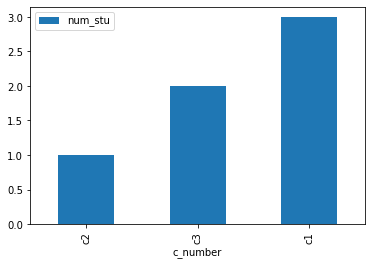

In [104]:
df = pandas.read_sql_query(sql,conn) 

df.plot.bar(x='c_number',y='num_stu')

In [105]:
sql = """
select professor.p_name,count(*) as num_course
from professor 
inner join course
on professor.p_email = course.p_email
group by p_name
"""

<AxesSubplot:xlabel='p_name'>

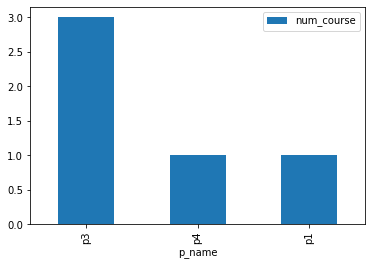

In [106]:
df = pandas.read_sql_query(sql,conn) 

df.plot.bar(x='p_name',y='num_course')

In [107]:
sql = """
    insert into student(s_email,s_name,major)
    values('{}','{}','{}')
    """.format('s5@jmu.edu','s5','GS')

print(sql) 


    insert into student(s_email,s_name,major)
    values('s5@jmu.edu','s5','GS')
    


In [108]:
cur=conn.cursor()

In [109]:
cur.execute(sql)

In [110]:
df = pandas.read_sql_query('select * from student',conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [111]:
 sql = """
 insert into professor(p_email,p_name,office)
    values('{}','{}','{}')
    """.format('p4@jmu.edu','p4','o4')

print(sql)


insert into professor(p_email,p_name,office)
   values('p4@jmu.edu','p4','o4')
   


In [112]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(p4@jmu.edu) already exists.


In [113]:
conn.commit()

In [114]:
df = pandas.read_sql_query('select * from professor',conn)

df[:]

,p_email,p_name,office
0,p2@jmu.edu,p1,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [124]:
conn.rollback()

In [121]:
sql = """
 insert into course(c_number,c_name,room,p_email)
    values('{}','{}','{}','{}')
    """.format('c5','linkedin','r2','p4@jmu.edu')

print(sql)


 insert into course(c_number,c_name,room,p_email)
    values('c5','linkedin','r2','p4@jmu.edu')
    


In [122]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(c5) already exists.


In [123]:
conn.commit()

In [125]:
df = pandas.read_sql_query('select * from course',conn)

df[:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,o3,p3@jmu.edu
3,c3,twitter,o3,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [130]:
sql = """
 update course
 set p_email = '{}'
 where p_email = '{}'
 """.format('p4@jmu.edu','p2@jmu.edu') 

In [131]:
cur.execute(sql)

In [132]:
conn.commit()

In [133]:
df = pandas.read_sql_query('select * from course',conn)

df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,o3,p3@jmu.edu
2,c3,twitter,o3,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [134]:
sql = """
 delete from professor 
 where p_email = '{}'
 """.format('p2@jmu.edu') 

In [135]:
cur.execute(sql)

In [136]:
conn.commit()

In [137]:
df = pandas.read_sql_query('select * from professor',conn)

df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4
